start: 2020/05/10 10:08:54
score[000]: 0.21406039126994414
score[001]: 0.24037599550146438
score[002]: 0.2546364099836447
score[003]: 0.18534700659049852
score[004]: 0.21328439895199114
score[005]: 0.17172682678009962
score[006]: 0.15829059244513477
score[007]: 0.14824198906595398
score[008]: 0.2173943519278183
score[009]: 0.2562488268754586
score[010]: 0.2250404548313143
score[011]: 0.17087936974625317
score[012]: 0.23686156478340514
score[013]: 0.27022347769713195
score[014]: 0.207334447718305
score[015]: 0.17788189987573044
score[016]: 0.17357824914908782
score[017]: 0.2421544551827155
score[018]: 0.18608555535329496
score[019]: 0.20275094327111354
score[020]: 0.26259871975005467
score[021]: 0.17218407196028573
score[022]: 0.21785015610610559
score[023]: 0.24485047803652604
score[024]: 0.26205391964062075
score[025]: 0.13898349549552558
score[026]: 0.1683285297191699
score[027]: 0.22183965054159682
score[028]: 0.1963324875746646
score[029]: 0.18444895414506746
score[030]: 0.18590986

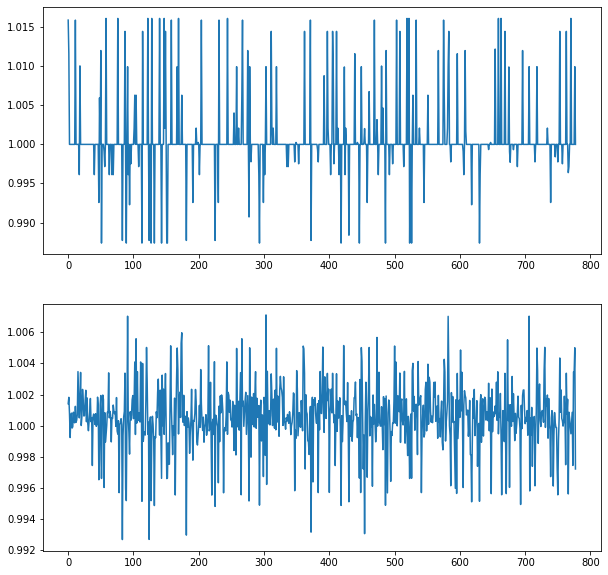

end: 2020/05/10 10:08:55


In [1]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime as dt
from mylib import bitcoin
%matplotlib inline

def plot(x, y_result, y_predict):
    _, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10))
    ax1.plot(list(range(len(x))), y_result)
    ax2.plot(list(range(len(x))), y_predict)
    plt.show()

def main():
    print("start: " + str(dt.now().strftime("%Y/%m/%d %H:%M:%S")))


    file_name = "train_v9"
    csv = pd.read_csv("datasets/" + file_name + ".csv")
    # 最後20%のデータでテスト
    test_start = int(len(csv) * 0.8)
    csv = csv[:test_start]

    print(f"score[avg]: {bitcoin.calc_avg_score(csv)}")
    (
        data_train,
        data_test,
        label_train,
        label_test,
    ) = bitcoin.set_train_test_dataset(csv, 0.2)
    model = bitcoin.create_model(data_train, label_train)

    x = data_test#[-3500:]
    y_result = list(label_test)#[-3500:]
    y_predict = list(model.predict(x))
    plot(x, y_result, y_predict)

    with open("models/" + file_name + ".pickle", mode="wb") as file:
        pickle.dump(model, file)
    

    print("end: " + str(dt.now().strftime("%Y/%m/%d %H:%M:%S")))

if __name__ == "__main__":
    main()